# 10. a)

In [1]:
library(ISLR)
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [2]:
cor(Weekly[, -9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.03228927,-0.03339001,-0.03000649,-0.03112792,-0.03051910,0.84194162,-0.03245989
Lag1,-0.032289274,1.000000000,-0.074853051,0.058635682,-0.071273876,-0.008183096,-0.064951313,-0.075031842
Lag2,-0.03339001,-0.07485305,1.00000000,-0.07572091,0.05838153,-0.07249948,-0.08551314,0.05916672
Lag3,-0.03000649,0.05863568,-0.07572091,1.00000000,-0.07539587,0.06065717,-0.06928771,-0.07124364
Lag4,-0.031127923,-0.071273876,0.058381535,-0.075395865,1.000000000,-0.075675027,-0.061074617,-0.007825873
Lag5,-0.030519101,-0.008183096,-0.072499482,0.060657175,-0.075675027,1.000000000,-0.058517414,0.011012698
Volume,0.84194162,-0.06495131,-0.08551314,-0.06928771,-0.06107462,-0.05851741,1.00000000,-0.03307778
Today,-0.032459894,-0.075031842,0.059166717,-0.071243639,-0.007825873,0.011012698,-0.033077783,1.000000000


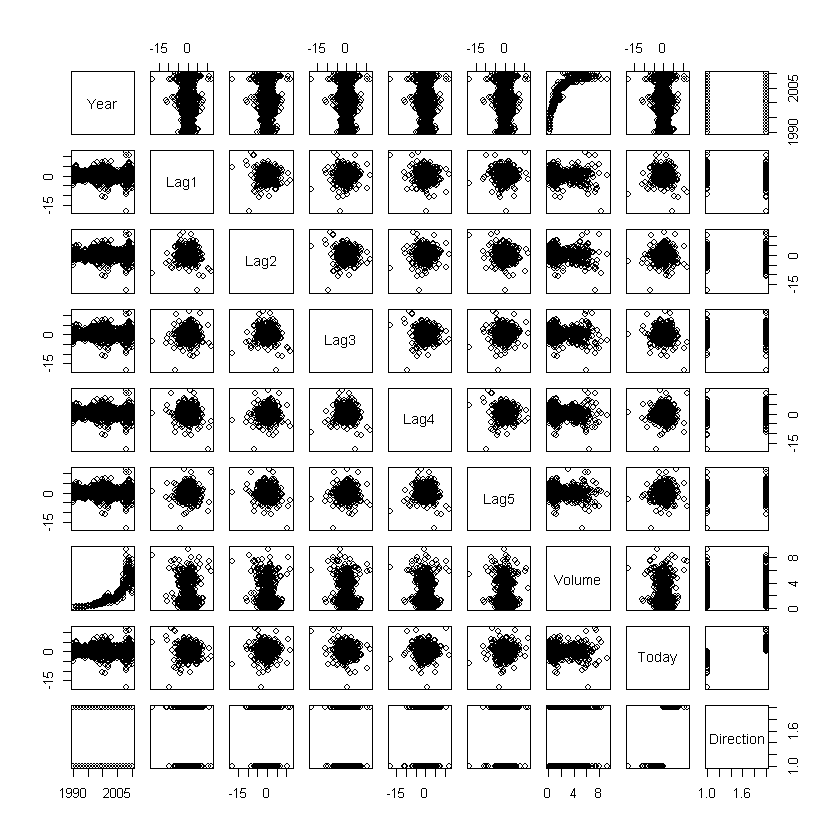

In [3]:
pairs(Weekly)

As a whole, no discernable patterns have jumpted out yet. One thing that is noticeable is that volume has steadily increased throughout the years - this makes sense because as technology improved the stock market became more accessible, not to mention the advent of HFT firms, which are meant to improve liquidity, which has the side effect of increasing volume.

# 10. b)

In [4]:
fit1 <- glm(Direction ~ Lag1 + Lag2+ Lag3 + Lag4 + Lag5 + Volume, family = binomial, data = Weekly)
summary(fit1)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


There is only one variable that appears significant: Lag2. Admittedly, this is a bit confusing since it seems to me as if there wouldn't be anything particularly special about the relationship between percentage return from the previous 2 days versus 1,3,4, or 5 days. It seems to me as if it's mostly just random chance.

# 10. c)

In [5]:
fit1.probs <- predict(fit1, type="response")
fit1.pred <- rep("Down", length(fit1.probs))
fit1.pred[fit1.probs > 0.5] = "Up"
table(fit1.pred, Weekly$Direction)

         
fit1.pred Down  Up
     Down   54  48
     Up    430 557

The model we fitted correctly predicts negative returns 11.15% of the time (54/(430+54)). It correctly predicts positive returns 92% of the time (48/(48+557)). In all, it correctly predicts 56.1% of the responses. As a whole, the model is overly optimistic.

Suppose we had a model that predicted "Up" on every single day; then the model would be correct 55.55% of the time, which nearly matches the performance of our linear model.

# 10. d)

In [6]:
train <- (Weekly$Year < 2009)
fit2 <- glm(Direction~Lag2, family="binomial", data=Weekly, subset=train)
test <- Weekly[!train, ]

fit2.probs <- predict(fit2, test, type="response")
fit2.pred <- rep("Down", length(test$Direction))
fit2.pred[fit2.probs > 0.5] = "Up"
table(fit2.pred, test$Direction)

         
fit2.pred Down Up
     Down    9  5
     Up     34 56

Correct positive predictions: $\frac{56}{56+5} = 0.918$. Correct negative predictions: $\frac{9}{9+34} = 0.209$. Total correct predictions: $\frac{56+9}{9+5+34+56} = 0.625$.

# 10. e)

In [7]:
library(MASS)
fit.lda <- lda(Direction~Lag2, data=Weekly, subset=train)
fit.lda

Call:
lda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

In [8]:
fit.lda.pred.class <- predict(fit.lda, test, type="response")$class
table(fit.lda.pred.class, test$Direction)

                  
fit.lda.pred.class Down Up
              Down    9  5
              Up     34 56

I should note a point of confusion for me, in case anybody else runs into it. Note that predict() does not return the same object when using lda versus logistic regression. This is because logistic regression returns a percentage value, and lda returns a list of the classification. For the dataframe that lda returns, \$class is the actual responses.

In this case, the results are exactly the same as that of logit.

# 10. f)

In [9]:
fit.qda <- qda(Direction~Lag2, data=Weekly, subset=train)
fit.qda.class <- predict(fit.qda, test)$class
table(fit.qda.class, test$Direction)

             
fit.qda.class Down Up
         Down    0  0
         Up     43 61

Earlier on, I jokingly mentioned that always predicting "Up" would yield a 56% accuracy - in this case, this is exactly what QDA did, with $\frac{61}{61+43}=0.587$ accuracy.

# 10. g) <- return to this later

In [10]:
# return to this later

return to this later

# 10. h)

In terms of total correct predictions, it would have to be logistic regression or LDA, since they give the same results. This is followed by QDA, then KNN with n=1.

# 10. i)

I'm going to skip this question - I doubt further experimentation will yield any more robust results, especially considering the nature of the data.

# 11. a)

In [11]:
summary(Auto)
mpg01 <- rep(0, length(Auto$mpg))
mpg01[Auto$mpg > median(Auto$mpg)] = 1
Auto <- data.frame(Auto, mpg01)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

# 11. b)

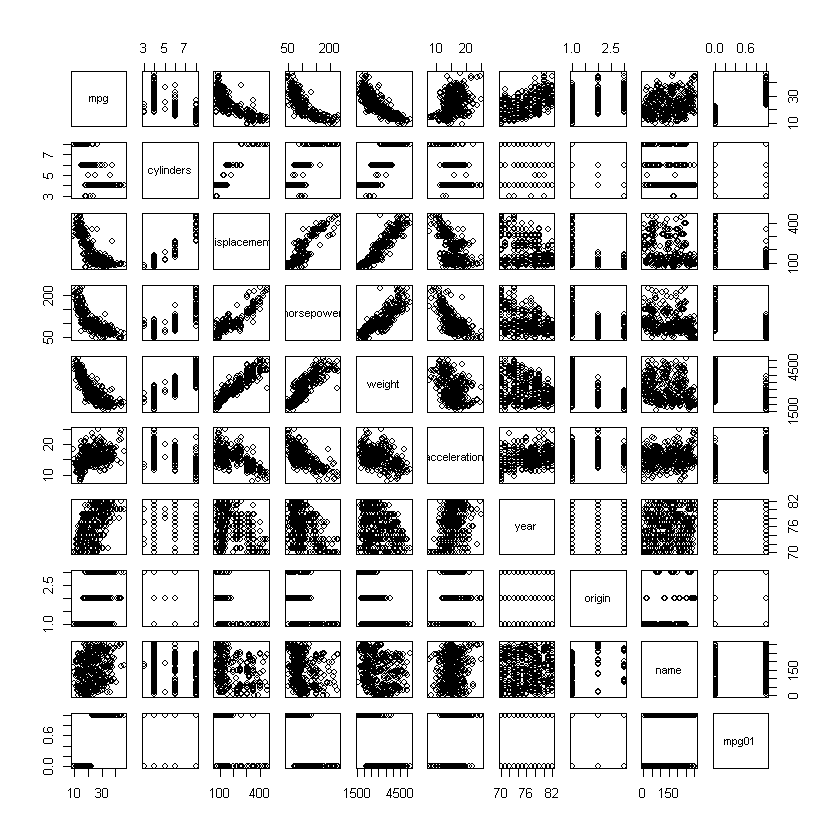

In [12]:
pairs(Auto)

At first glance, there appears to be a negative correlation between mpg01 and displacement, horsepower, and weight. Strangely enough, it seems to be positively correlated with acceleration. This sounds strange at first thought because high accleration is associated with sports cars, but larger vehicles (trucks, SUVS, etc) will have lower acceleration. Since the number of smaller fuel-efficient vehicles vastly outweigh the number of sports cars, it makes sense that acceleration seems to be positively correlated with mpg01.

If there is a relation with the other variables, it's difficult to see; an educated guess would be that as the years go on, mpg01 should increase, and perhaps Japanese cars will have higher mpg01 than American ones.

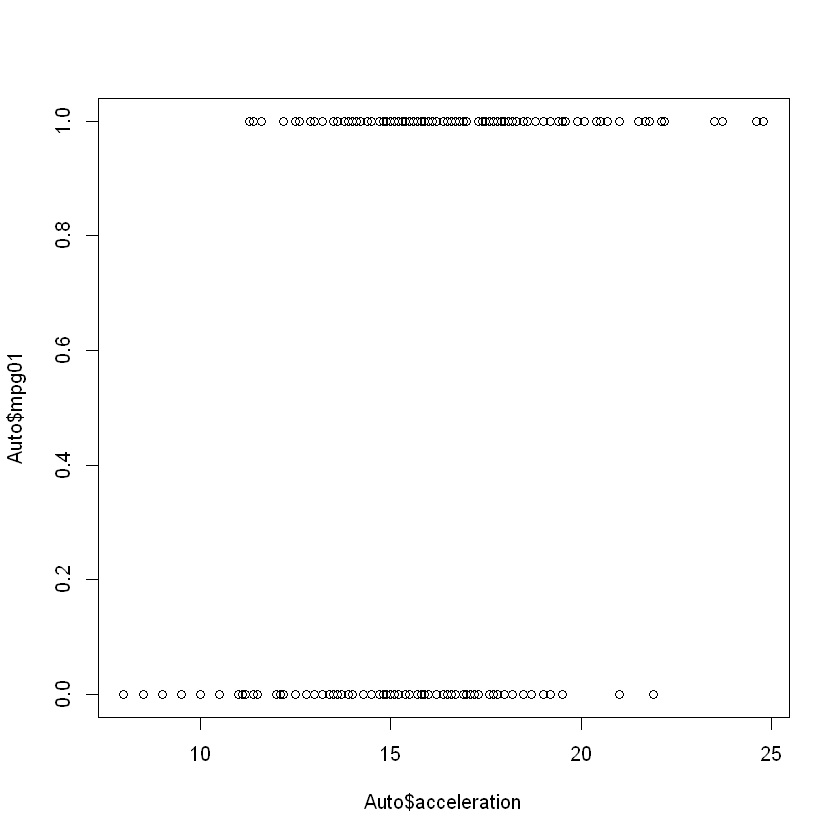

In [13]:
plot(Auto$mpg01~Auto$acceleration)

Graphically, many of these plots are difficult to interpret because mpg01 is a binary variable.

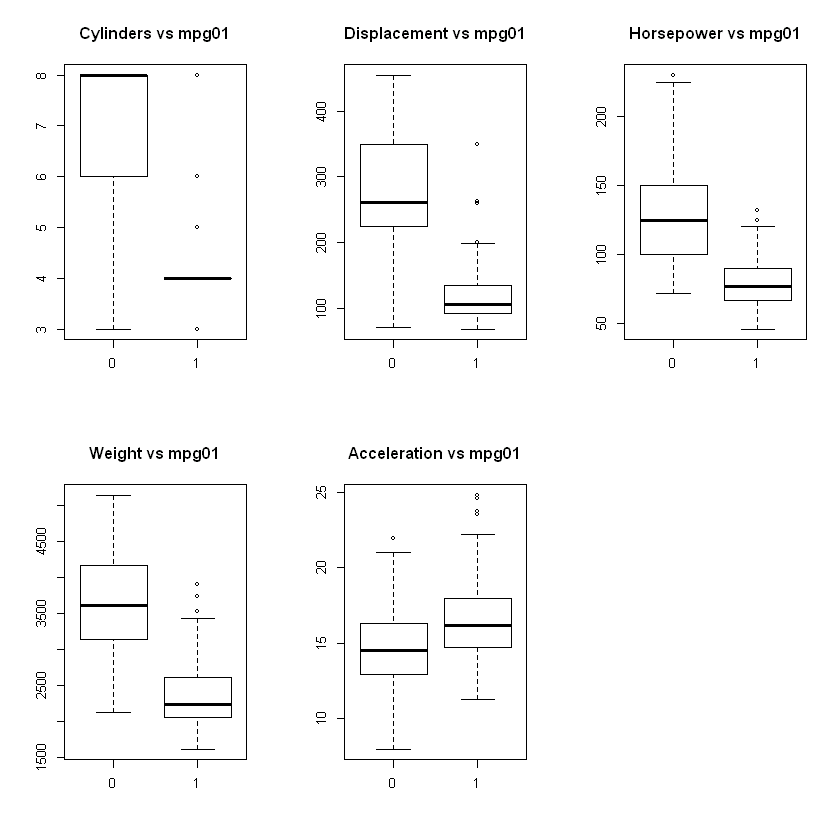

In [14]:
par(mfrow=c(2,3))
boxplot(cylinders~mpg01, data=Auto, main="Cylinders vs mpg01")
boxplot(displacement~mpg01, data=Auto, main="Displacement vs mpg01")
boxplot(horsepower~mpg01, data=Auto, main="Horsepower vs mpg01")
boxplot(weight~mpg01, data=Auto, main="Weight vs mpg01")
boxplot(acceleration~mpg01, data=Auto, main="Acceleration vs mpg01")

There are clearly *some* sort of relationships between mpg01 and the 5 variables plotted.

# 11. c)

We will split the data into a training and test set: even and odd years.

In [15]:
train <- (Auto$year%%2 == 0)
Auto.train <- Auto[train, ]
Auto.test <- Auto[!train, ]
mpg01.test <- Auto$mpg01[!train]
length(Auto.test)

[1] 10

# 11. d)

In [16]:
library(MASS)
Auto.lda <- lda(mpg01~ cylinders+weight+displacement+horsepower+weight+acceleration, data=Auto, subset=train)
Auto.lda

Call:
lda(mpg01 ~ cylinders + weight + displacement + horsepower + 
    weight + acceleration, data = Auto, subset = train)

Prior probabilities of groups:
        0         1 
0.4571429 0.5428571 

Group means:
  cylinders   weight displacement horsepower acceleration
0  6.812500 3604.823     271.7396  133.14583     14.47500
1  4.070175 2314.763     111.6623   77.92105     16.62895

Coefficients of linear discriminants:
                       LD1
cylinders    -0.6825609783
weight       -0.0010554398
displacement  0.0001619815
horsepower    0.0038925740
acceleration -0.0273265018

In [17]:
Auto.pred.lda <- predict(Auto.lda, Auto.test)$class
table(Auto.pred.lda, mpg01.test)
mean(Auto.pred.lda != mpg01.test)

             mpg01.test
Auto.pred.lda  0  1
            0 86  8
            1 14 74

[1] 0.1208791

The overall error rate is 12.08%. The accuracy for positive predictions is $\frac{74}{8+74}=90.2$, and the accuracy for negative predictions is $\frac{86}{86+14}=0.86$, so it tends to overestimate whether mpg is over the median for a given car.

# 11. e)

In [18]:
Auto.qda <- qda(mpg01~cylinders+weight+displacement+horsepower+weight+acceleration, data=Auto, subset=train)
Auto.qda

Call:
qda(mpg01 ~ cylinders + weight + displacement + horsepower + 
    weight + acceleration, data = Auto, subset = train)

Prior probabilities of groups:
        0         1 
0.4571429 0.5428571 

Group means:
  cylinders   weight displacement horsepower acceleration
0  6.812500 3604.823     271.7396  133.14583     14.47500
1  4.070175 2314.763     111.6623   77.92105     16.62895

In [19]:
Auto.pred.qda <- predict(Auto.qda, Auto.test)$class
table(Auto.pred.qda, mpg01.test)
mean(Auto.pred.qda != mpg01.test)

             mpg01.test
Auto.pred.qda  0  1
            0 88 12
            1 12 70

[1] 0.1318681

The overall error rate is 13.19%. The accuracy for positive predictions is $\frac{70}{70+12}=0.85$, and the accuracy for negative predictions is $\frac{88}{88+12}=0.88$.

# 11. f)

In [20]:
Auto.logit <- glm(mpg01~cylinders+weight+displacement+horsepower+weight+acceleration, family="binomial", data=Auto, subset=train)
summary(Auto.logit)


Call:
glm(formula = mpg01 ~ cylinders + weight + displacement + horsepower + 
    weight + acceleration, family = "binomial", data = Auto, 
    subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6447  -0.0300   0.1093   0.2772   2.4968  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  21.5252507  5.2710952   4.084 4.43e-05 ***
cylinders    -1.0514731  0.6606828  -1.591   0.1115    
weight       -0.0018981  0.0014644  -1.296   0.1949    
displacement -0.0009795  0.0155812  -0.063   0.9499    
horsepower   -0.0759966  0.0355423  -2.138   0.0325 *  
acceleration -0.2253047  0.2140185  -1.053   0.2925    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 289.577  on 209  degrees of freedom
Residual deviance:  82.141  on 204  degrees of freedom
AIC: 94.141

Number of Fisher Scoring iterations: 8


In [21]:
Auto.probs.logit <- predict(Auto.logit, Auto.test)
Auto.pred.logit <- rep(0, length(mpg01.test))
Auto.pred.logit[Auto.probs.logit > 0.5] = 1

table(Auto.pred.logit, mpg01.test)
mean(Auto.pred.logit != mpg01.test)

               mpg01.test
Auto.pred.logit  0  1
              0 89 14
              1 11 68

[1] 0.1373626

The overall error rate is 12.08%. The accuracy for positive predictions is $\frac{74}{8+74}=90.2$, and the accuracy for negative predictions is $\frac{86}{86+14}=0.86$, so it tends to overestimate whether mpg is over the median for a given car.

# 11. g)

In [22]:
library(class)

# Auto[ ,1:5] represents all the items from cylinder, acceleration, displacement, weight, and acceleration

Auto.train.matrix <- Auto[ ,1:5][train,]
Auto.test.matrix <- Auto[ ,1:5][!train,]
Auto.train.mpg01 <- mpg01[train]
set.seed(1)
Auto.pred.knn <- knn(Auto.train.matrix, Auto.test.matrix, Auto.train.mpg01, k=1)

table(Auto.pred.knn, mpg01.test)
mean(Auto.pred.logit != mpg01.test)

             mpg01.test
Auto.pred.knn  0  1
            0 83 11
            1 17 71

[1] 0.1373626

The overall error rate is 13.73%. The accuracy for positive predictions is $\frac{71}{71+11}=0.87$, and the accuracy for negative predictions is $\frac{83}{83+17}=0.83$.

# 12. a)

In [23]:
Power <- function() {
    print(2^3)
}

Power()

[1] 8


# 12. b)

In [24]:
Power2 <- function(x,a) {
    print(x^a)
}

Power2(3,8)

[1] 6561


# 12. c)

In [25]:
Power2(10,3)
Power2(8,17)
Power2(131,3)

[1] 1000
[1] 2.2518e+15
[1] 2248091


# 12. d)

In [26]:
Power3 <- function(x,a) {
    result <- x^a
    return(result)
}

# 12. e)

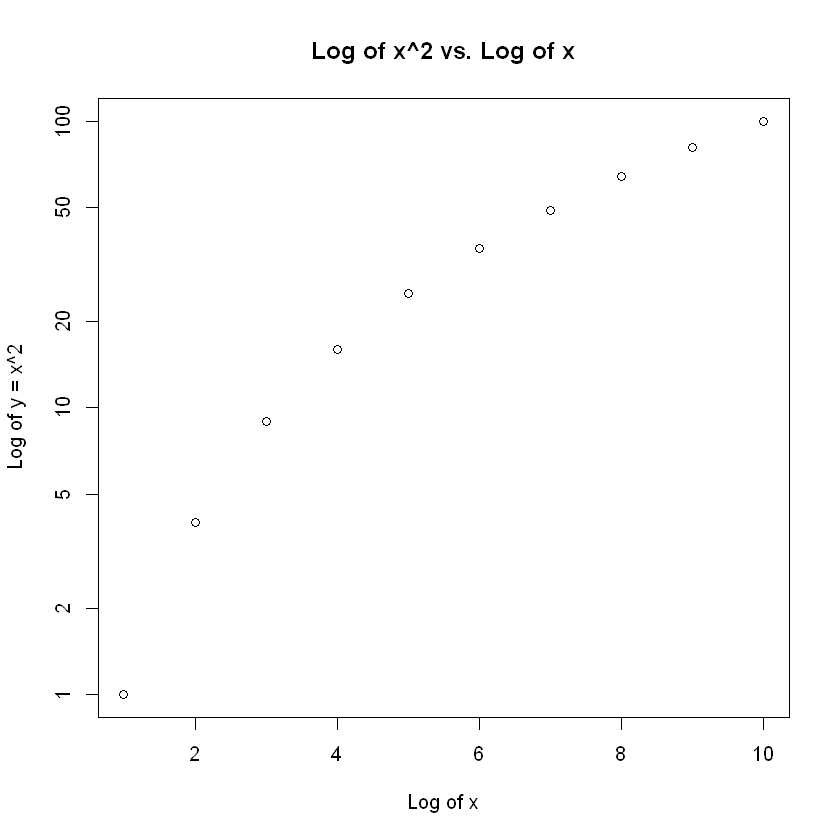

In [27]:
domain <- 1:10
plot(domain, Power3(domain, 2), log = "y", ylab = "Log of y = x^2", xlab = "Log of x", 
    main = "Log of x^2 vs. Log of x")

# 12. f)

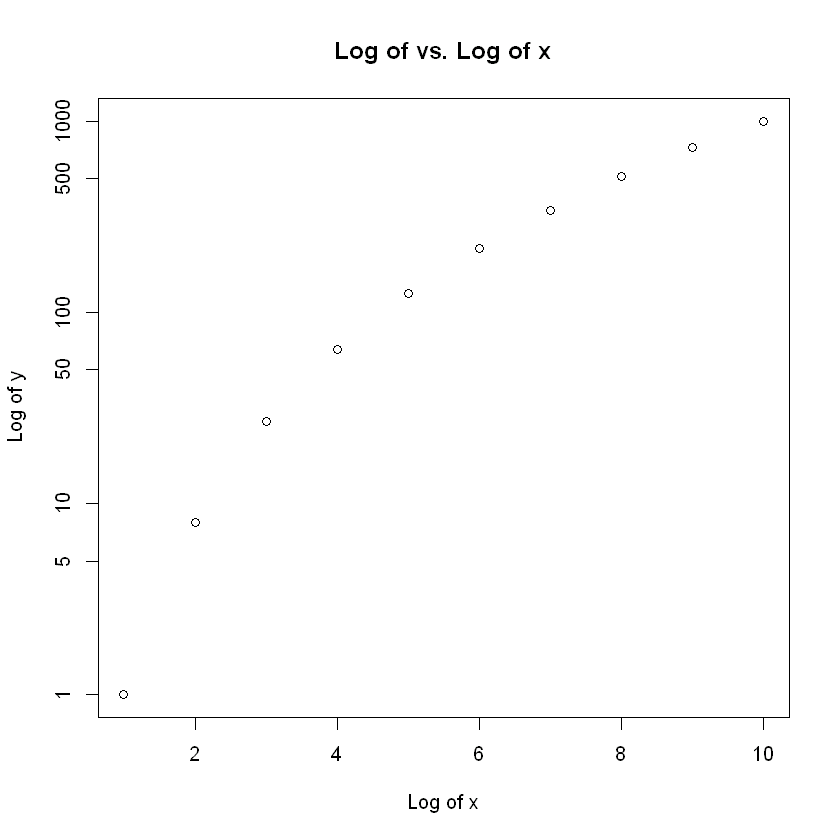

In [28]:
PlotPower <- function(domain, b) {
    plot(domain, Power3(domain, 3), log = "y", ylab = "Log of y", xlab = "Log of x", main = "Log of vs. Log of x")
}

PlotPower(1:10,3)

# 13.

This question asks you to analyze the Boston data set - you can basically do whatever you want, there are no specific instructions.

In [29]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [30]:
# creating a variable indicating which locations are above the median crime rate
crim01 <- rep(0, length(Boston$crim))
crim01[Boston$crim > median(Boston$crim)] = 1
Boston <- data.frame(Boston, crim01)

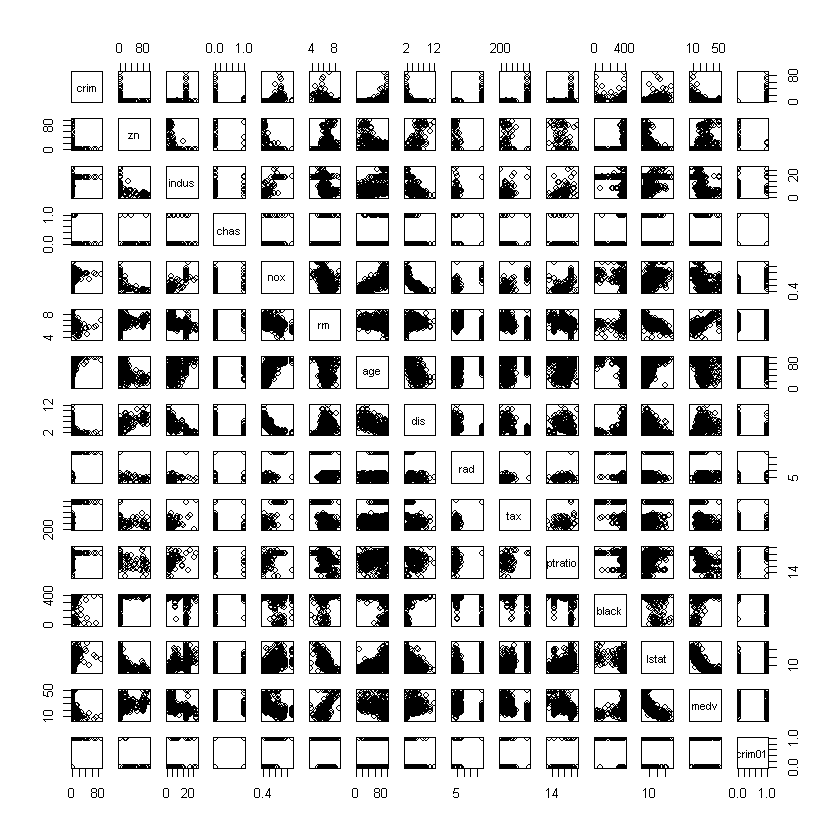

In [31]:
plot(Boston)

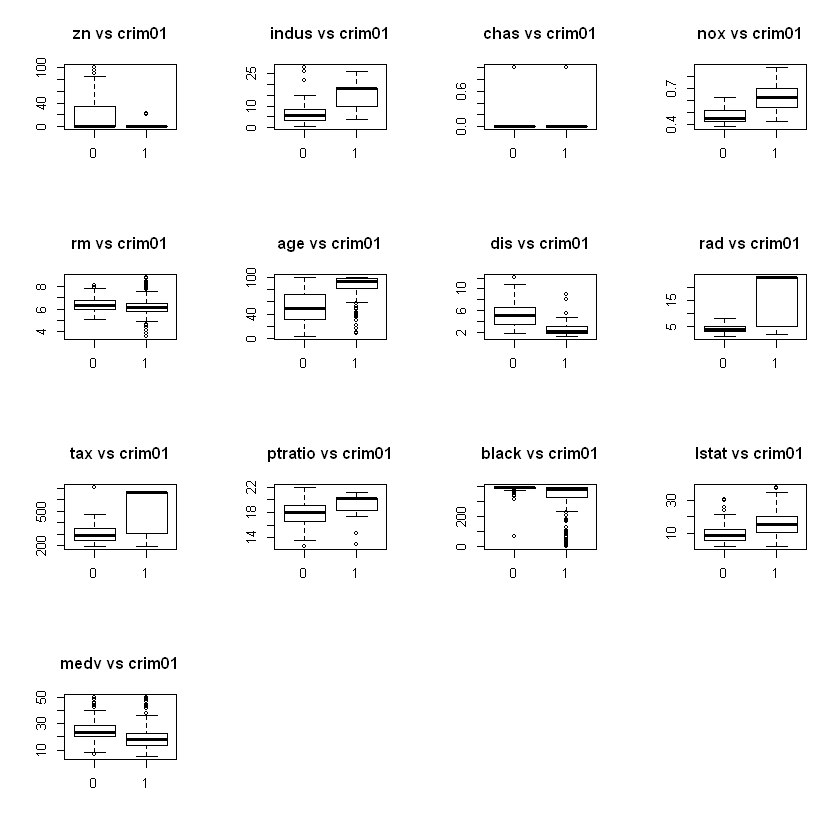

In [32]:
par(mfrow=c(4,4))
boxplot(zn~crim01, data=Boston, main="zn vs crim01")
boxplot(indus~crim01, data=Boston, main="indus vs crim01")
boxplot(chas~crim01, data=Boston, main="chas vs crim01")
boxplot(nox~crim01, data=Boston, main="nox vs crim01")
boxplot(rm~crim01, data=Boston, main="rm vs crim01")
boxplot(age~crim01, data=Boston, main="age vs crim01")
boxplot(dis~crim01, data=Boston, main="dis vs crim01")
boxplot(rad~crim01, data=Boston, main="rad vs crim01")
boxplot(tax~crim01, data=Boston, main="tax vs crim01")
boxplot(ptratio~crim01, data=Boston, main="ptratio vs crim01")
boxplot(black~crim01, data=Boston, main="black vs crim01")
boxplot(lstat~crim01, data=Boston, main="lstat vs crim01")
boxplot(medv~crim01, data=Boston, main="medv vs crim01")

Variables that we can obviously exclude include zn, chas, and crim.

In [33]:
# functions that selects all even and odd values
even <- function(x){ x%%2 == 0 }
odd <- function(x){ x%%2 != 0}

train <- even(1:length(Boston$crim))
test <- odd(1:length(Boston$crim))

Boston.train <- Boston[train, ]
Boston.test <- Boston[test, ]

## Logistic Regression

In [34]:
Boston.logit <- glm(crim01~.-crim-zn-chas, family="binomial", data=Boston, subset=train)
Boston.logit

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred


Call:  glm(formula = crim01 ~ . - crim - zn - chas, family = "binomial", 
    data = Boston, subset = train)

Coefficients:
(Intercept)        indus          nox           rm          age          dis  
 -31.816555    -0.091961    50.606898    -1.154184     0.054078     0.509419  
        rad          tax      ptratio        black        lstat         medv  
   0.720186    -0.005480     0.717982    -0.039074     0.004732     0.286161  

Degrees of Freedom: 252 Total (i.e. Null);  241 Residual
Null Deviance:	    350.7 
Residual Deviance: 92.98 	AIC: 117

The fact that there's a perfect separation almost certainly means overfitting has occured. I haven't yet covered how to mitigate this, so I'll come back later when I know how to penalize this type of overfitting.

In [35]:
Boston.logit.probs <- predict(Boston.logit, Boston.test, type="response")
Boston.logit.pred <- rep(0, length(Boston.test$crim01))
Boston.logit.pred[Boston.logit.probs > 0.5] = 1

table(Boston.logit.pred, Boston.test$crim01)
mean(Boston.logit.pred != Boston.test$crim01)

                 
Boston.logit.pred   0   1
                0 116  16
                1   9 112

[1] 0.09881423

The mean error rate is 9.9%. On average, the positive success rate is $\frac{112}{112+16}=0.875$ and the negative success rate is $\frac{116}{116+9}=0.928$.

## LDA (Linear Discriminant Analysis)

In [40]:
Boston.lda <- lda(crim01~.-crim-zn-chas, data=Boston, subset=train)
Boston.lda

Call:
lda(crim01 ~ . - crim - zn - chas, data = Boston, subset = train)

Prior probabilities of groups:
        0         1 
0.5059289 0.4940711 

Group means:
      indus       nox       rm      age      dis       rad      tax  ptratio
0  6.938828 0.4703344 6.390547 50.37812 5.103491  4.195312 300.5703 17.89766
1 15.398800 0.6410720 6.214408 87.04720 2.470022 15.072000 515.0640 19.02800
     black     lstat     medv
0 390.6462  9.111797 24.97656
1 327.6479 15.820000 20.21440

Coefficients of linear discriminants:
                  LD1
indus    1.417666e-02
nox      7.778085e+00
rm       5.335411e-02
age      1.720112e-02
dis      3.424619e-02
rad      5.918206e-02
tax      1.513798e-05
ptratio  7.132100e-02
black   -8.233277e-04
lstat    1.216676e-02
medv     4.553239e-02

In [43]:
Boston.lda.pred <- predict(Boston.lda, Boston.test)$class
table(Boston.lda.pred, Boston.test$crim01)
mean(Boston.lda.pred != Boston.test$crim01)

               
Boston.lda.pred   0   1
              0 118  32
              1   7  96

[1] 0.1541502

The mean error rate is 15.41%.

## QDA (Quadratic Discriminant Analysis)

In [44]:
Boston.qda <- qda(crim01~.-crim-zn-chas, data=Boston, subset=train)
Boston.qda

Call:
qda(crim01 ~ . - crim - zn - chas, data = Boston, subset = train)

Prior probabilities of groups:
        0         1 
0.5059289 0.4940711 

Group means:
      indus       nox       rm      age      dis       rad      tax  ptratio
0  6.938828 0.4703344 6.390547 50.37812 5.103491  4.195312 300.5703 17.89766
1 15.398800 0.6410720 6.214408 87.04720 2.470022 15.072000 515.0640 19.02800
     black     lstat     medv
0 390.6462  9.111797 24.97656
1 327.6479 15.820000 20.21440

In [45]:
Boston.qda.pred <- predict(Boston.qda, Boston.test)$class
table(Boston.qda.pred, Boston.test$crim01)
mean(Boston.qda.pred != Boston.test$crim01)

               
Boston.qda.pred   0   1
              0 123  26
              1   2 102

[1] 0.1106719

The mean error rate is 11.06%.

## KNN (K-Nearest Neighbours)